# Dataset exploration 

In [1]:
# Load libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from matplotlib_venn import venn2, venn2_circles

In [2]:
from matplotlib.patches import Rectangle, Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib_venn import venn2

import warnings
warnings.filterwarnings('ignore')

import re
import string

import spacy # Leading library for NLP
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer

from sklearn import preprocessing

2023-09-12 17:06:45.777701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load spacy en_core_web_sm 
# !python -m spacy download en_core_web_sm 

### Dealing with corporations dataset

In [4]:
# Load data and unify column_names, columns, and values for further processing
corporations_disclosing_df = pd.DataFrame()
corporations_df = pd.DataFrame()

In [5]:
'Corporations - Disclosing - Climate Change'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file name based on the year
    file_cc_dis = f"{year}_Corporates_Disclosing_to_CDP_Climate_Change.csv"
    
    # Load corporations disclosing for the current year
    climate_disclosing = pd.read_csv(file_cc_dis)
    
    # Append the data to the DataFrame
    corporations_disclosing_df = corporations_disclosing_df.append(climate_disclosing, ignore_index=True)

In [6]:
# Get 5 random rows to show the years have blended together 
random_corporations_disclosing_df = corporations_disclosing_df.sample(n=5)
random_corporations_disclosing_df.head()

,account_number,organization,survey_year,country,region,invitation_status,public,samples,response_received_date,minimum_tier,...,authority_types,activities,sectors,industries,primary_activity,primary_sector,primary_industry,primary_questionnaire_sector,primary_ticker,tickers
1775,53090,Stance Healthcare,2020,Canada,NaN,Submitted,public,Self selected companies climate change,2020-06-01T18:57:35Z,Climate Change - Full,...,Investor,"Furniture, Medical equipment","Leisure & home manufacturing, Medical equipme...","Biotech, health care & pharma, Manufacturing",Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",General,0082660D CN,0082660D CN
262,19396,Trillium Health Care,2018,United States of America,NaN,Submitted,public,NaN,2018-08-30T00:00:00Z,NaN,...,Supply Chain,Pharmaceuticals,Biotech & pharma,"Biotech, health care & pharma",Pharmaceuticals,Biotech & pharma,"Biotech, health care & pharma",General,NaN,NaN
2015,828270,COLE TOOLING & STAMPING,2020,United States of America,NaN,Submitted,public,NaN,2020-09-28T15:16:06Z,Climate Change - Minimum,...,Supply Chain,Fabricated metal components,Metal products manufacturing,Manufacturing,Fabricated metal components,Metal products manufacturing,Manufacturing,General,NaN,NaN
800,28840,Tessy Plastics,2019,United States of America,NaN,Submitted,public,NaN,2019-07-31T12:47:07Z,NaN,...,Supply Chain,Plastic products,Plastic product manufacturing,Manufacturing,Plastic products,Plastic product manufacturing,Manufacturing,General,NaN,NaN
2155,6550,Flex Ltd.,2020,United States of America,NaN,Submitted,public,"Benchmark, CCGR1800, Continuity Climate Chang...",2020-08-25T21:14:34Z,Climate Change - Full,...,"Investor, Supply Chain",Electronic components,Electrical & electronic equipment,Manufacturing,Electronic components,Electrical & electronic equipment,Manufacturing,General,FLEX US,FLEX US


In [7]:
'Corporations - Disclosing - Water Security'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file name based on the year
    file_ws_dis = f"{year}_Corporates_Disclosing_to_CDP_Water_Security.csv"
    
    # Load corporations disclosing for the current year
    water_disclosing = pd.read_csv(file_ws_dis)
    
    # Append the data to the DataFrame
    corporations_disclosing_df = corporations_disclosing_df.append(water_disclosing, ignore_index=True)

In [8]:
# Get 5 random rows to show the years have blended together 
random_corporations_disclosing_df = corporations_disclosing_df.sample(n=5)
random_corporations_disclosing_df.head()

,account_number,organization,survey_year,country,region,invitation_status,public,samples,response_received_date,minimum_tier,...,authority_types,activities,sectors,industries,primary_activity,primary_sector,primary_industry,primary_questionnaire_sector,primary_ticker,tickers
538,9829,Johnson & Johnson,2018,United States of America,NaN,Submitted,public,"Benchmark, CCGR1000, CCGR1800, FTSE All-World...",2018-08-15T00:00:00Z,Climate Change - Full,...,"Investor, Supply Chain","Health care services, Health care supplies, M...","Biotech & pharma, Chemicals, Medical equipmen...","Biotech, health care & pharma, Materials, Ser...",Pharmaceuticals,Biotech & pharma,"Biotech, health care & pharma",General,JNJ US,JNJ US
1693,829489,"ROCKFORD PROCESS CONTROL, INC.",2020,United States of America,NaN,Submitted,public,NaN,2020-08-20T16:31:28Z,Climate Change - Full,...,Supply Chain,Recreational vehicles,Transportation equipment,Manufacturing,Recreational vehicles,Transportation equipment,Manufacturing,Transport OEMS,NaN,NaN
590,19859,United Technologies Corporation,2018,United States of America,NaN,Submitted,public,"Benchmark, CCGR1000, CCGR1800, Environmental,...",2018-07-16T00:00:00Z,Climate Change - Full,...,"Investor, Supply Chain","Electrical equipment, Engines & motors, Other...","Electrical & electronic equipment, Powered ma...",Manufacturing,Engines & motors,Powered machinery,Manufacturing,Transport OEMS - EPM,UTX US,UTX US
194,661,Ameren Corporation,2018,United States of America,NaN,Submitted,public,"Benchmark, CCGR1000, CCGR1800, Electric Utili...",2018-08-15T00:00:00Z,Climate Change - Full,...,"Investor, Supply Chain",Electricity networks,Energy utility networks,Infrastructure,Electricity networks,Energy utility networks,Infrastructure,NaN,AEE US,AEE US
750,23276,Avis Budget Group,2019,United States of America,NaN,Submitted,public,"Continuity Climate Change, Environmental",2019-07-29T23:43:22Z,Climate Change - Full,...,"Investor, Supply Chain",Vehicles & machinery rental & leasing,"Trading, wholesale, distribution, rental & le...",Retail,Vehicles & machinery rental & leasing,"Trading, wholesale, distribution, rental & lea...",Retail,General,CAR US,CAR US


In [9]:
'Corporations - Responses - Climate Change'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file path for the CSV file based on the year
    file_cc_res = f"{year}_Full_Climate_Change_Dataset.csv"

    # Load corporations' responses for the current year
    climate = pd.read_csv(file_cc_res)

    # Adding new columns
    climate['questionnaire'] = 'Corporations Climate Change'
    climate['section'] = 'tbd'

    # Extracting question number information
        # The 'question_number' column appears to contain question numbers in a format like "Q1.1", where the major number is before the dot and the minor number is after the dot.
        # The lambda functions applied to each row extract the major and minor numbers from the 'question_number' column and store them in separate columns as float and string, respectively.
    climate['question_number_major'] = climate['question_number'].apply(lambda x: float(x.split('.')[0][1:]))
    climate['question_number_minor'] = climate['question_number'].apply(lambda x: x.split('.')[1])

    # Appending to the existing dataframe
    corporations_df = corporations_df.append(climate)

In [10]:
# Get 5 random rows to show the years have blended together 
random_corporations_df = corporations_df.sample(n=5)
random_corporations_df.head()

,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,module_name,question_number,...,row_number,row_name,data_point_name,data_point_id,response_value,comments,questionnaire,section,question_number_major,question_number_minor
361083,16072,"Ryder System, Inc.",2020,2020-08-25T14:17:41Z,NaN,88724,2020-08-25T15:41:56Z,C2.4a,C2. Risks and opportunities,C2.4a,...,3,NaN,C2.4a_C1_Provide details of opportunities iden...,7558.0,Opp3,NaN,Corporations Climate Change,tbd,2.0,4a
637300,4151,CVS Health,2019,2019-07-31T14:48:52Z,NaN,46611,2019-09-19T20:25:33Z,C8.2d,C8. Energy,C8.2d,...,26,Butane,C8.2d_C3_List the average emission factors of ...,162.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2d
201052,11905,"Micron Technology, Inc.",2019,2019-07-26T14:51:09Z,NaN,41126,2019-09-18T17:59:11Z,C8.2d,C8. Energy,C8.2d,...,117,Sulphite Lyes,C8.2d_C4_List the average emission factors of ...,7630.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2d
206266,20917,"Yum! Brands, Inc.",2018,2018-08-15T00:00:00Z,NaN,31888,2018-09-10T22:29:05Z,C4.2,C4. Targets and performance,C4.2,...,3,NaN,C4.2_C9_Provide details of other key climate-r...,8480.0,69.0,NaN,Corporations Climate Change,tbd,4.0,2
779933,40195,"Essential Utilities, Inc",2019,2019-07-18T13:30:04Z,NaN,46682,2019-09-19T09:26:45Z,C4.3b,C4. Targets and performance,C4.3b,...,3,NaN,C4.3b_C6_Provide details on the initiatives im...,73.0,40000.0,NaN,Corporations Climate Change,tbd,4.0,3b


In [11]:
'Corporations - Responses - Water Security'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file path for the CSV file based on the year
    file_ws_res = f"{year}_Full_Water_Security_Dataset.csv"

    # Load corporations' responses for the current year
    water = pd.read_csv(file_ws_res)

    # Adding new columns
    water['questionnaire'] = 'Corporations Water'
    water['section'] = 'tbd'

    # Extracting question number information
        # The 'question_number' column appears to contain question numbers in a format like "Q1.1", where the major number is before the dot and the minor number is after the dot.
        # The lambda functions applied to each row extract the major and minor numbers from the 'question_number' column and store them in separate columns as float and string, respectively.
    water['question_number_major'] = water['question_number'].apply(lambda x: x.split('.')[0])
    water['question_number_major'] = water['question_number_major'].apply(lambda x: int(x.split('-')[1][-1]) if (len(x.split('-')) > 1) else float(x[1:]) )
    water['question_number_minor'] = water['question_number'].apply(lambda x: x.split('.')[1])

    # Appending to the existing dataframe
    corporations_df = corporations_df.append(water)

In [12]:
# Get 5 random rows to show the cc and ws blended together 
random_corporations_df = corporations_df.sample(n=5)
random_corporations_df.head()

,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,module_name,question_number,...,row_number,row_name,data_point_name,data_point_id,response_value,comments,questionnaire,section,question_number_major,question_number_minor
81590,11383,"Marsh & McLennan Companies, Inc.",2019,2019-07-31T13:58:19Z,NaN,41400,2019-09-19T17:37:13Z,C8.2d,C8. Energy,C8.2d,...,135,Wood Logs,C8.2d_C4_List the average emission factors of ...,7630.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2d
43840,20175,Verizon Communications Inc.,2018,2018-08-23T00:00:00Z,NaN,12067,2019-02-14T14:46:12Z,C4.2,C4. Targets and performance,C4.2,...,1,NaN,C4.2_C8_Provide details of other key climate-r...,1914.0,24.0,NaN,Corporations Climate Change,tbd,4.0,2
1039780,10233,Kohl's Corporation,2019,2019-07-31T20:33:31Z,NaN,42049,2019-09-20T23:31:14Z,C8.2d,C8. Energy,C8.2d,...,93,Petrochemical Feedstocks,C8.2d_C1_List the average emission factors of ...,160.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2d
507040,16639,SEI Investments Company,2019,2019-07-31T16:46:47Z,NaN,52194,2019-09-20T09:35:02Z,C8.2a,C8. Energy,C8.2a,...,2,Consumption of purchased or acquired electricity,C8.2a_C3_Report your organizationâ€™s energy c...,7622.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2a
438298,50821,QUALITY TECHNOLOGY SERVICES,2020,2020-08-26T15:41:01Z,NaN,89301,2020-08-26T19:04:33Z,C8.2a,C8. Energy,C8.2a,...,5,Consumption of purchased or acquired cooling,C8.2a_C4_Report your organizationâ€™s energy c...,5231.0,NaN,NaN,Corporations Climate Change,tbd,8.0,2a


### Dealing with cities dataset

In [13]:
# Load data and unify column_names, columns, and values for further processing
cities_disclosing_df = pd.DataFrame()
cities_df = pd.DataFrame()

In [14]:
'Cities - Disclosing'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file name based on the year
    file_city_dis = f"{year}_Cities_Disclosing_to_CDP.csv"
    
    # Load corporations disclosing for the current year
    cities_disclosing = pd.read_csv(file_city_dis)
    
    # Append the data to the DataFrame
    cities_disclosing_df = cities_disclosing_df.append(cities_disclosing, ignore_index=True)

In [15]:
# Get 5 random rows to show the years have blended together 
random_cities_disclosing_df = cities_disclosing_df.sample(n=5)
random_cities_disclosing_df.head()

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
200,2018,54104,City of Boulder,Boulder,United States of America,North America,CDP Cities,public,No,108707.0,2016,POINT (-105.252 40.0274),2020-06-25T04:52:49.050
1715,2020,35898,Greater Manchester,Manchester,United Kingdom of Great Britain and Northern I...,Europe,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,2835686.0,2019,POINT (-2.15783 53.4576),2020-09-07T09:45:19.793
1748,2020,831616,Commune de Tsévié,Tsévié,Togo,Africa,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,160430.0,2020,POINT (1.21333 6.42611),2020-09-07T09:45:19.793
1409,2019,50154,City of Turku,Turku,Finland,Europe,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,191000.0,2018,POINT (22.2666 60.4518),2020-06-25T04:52:51.327
990,2019,58668,"City of New Bedford, MA",New Bedford,United States of America,North America,CDP Cities,public,No,95120.0,2017,POINT (-70.9342 41.6362),2020-06-25T04:52:51.327


In [16]:
'Cities - Responses'

# List of years
years = [2018, 2019, 2020]

for year in years:
    # Construct the file name based on the year
    file_city_res = f"{year}_Full_Cities_Dataset.csv"
    
    # Load corporations disclosing for the current year
    cities = pd.read_csv(file_city_res)
    
    # Extracting question number information
    cities['question_number_major'] = cities['Question Number'].apply(lambda x: x.split('.')[0])
    cities['question_number_minor'] = cities['Question Number'].apply(lambda x: x.split('.')[1] if (len(x.split('.')) > 1) else '')
    
    # Append the data to the DataFrame
    cities_df = cities_df.append(cities, ignore_index=True)

In [17]:
# Get 5 random rows to show the years have blended together 
random_cities_df = cities_df.sample(n=5)
random_cities_df.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update,question_number_major,question_number_minor
372351,Cities 2019,2019,832078,Município de Mafra,Portugal,Europe,Opportunities,Opportunities,6.2,"List any emission reduction, adaptation, water...",5,Project description,1,NaN,NaN,NaN,NaN,24/06/2020 05:30:36 AM,6,2
34723,CDP Cities 2018,2018,56276,New Taipei City Government,"Taiwan, Greater China",East Asia,City Wide Emissions,GHG Emissions Data,7.3a,Please provide a summary of emissions by secto...,1,Emissions (metric tonnes CO2e),5,Transportation – Scope 1 (II.X.1),4522317,NaN,NaN,24/06/2020 05:28:18 AM,7,3a
1185783,Cities 2020,2020,3422,Greater London Authority,United Kingdom of Great Britain and Northern I...,Europe,Water Security,Water Supply Management,14.3,Please select the actions you are taking to re...,3,Status of action,2,NaN,Implementation,NaN,NaN,09/07/2020 09:45:36 AM,14,3
751823,Cities 2020,2020,50354,Alcaldía de Tegucigalpa,Honduras,Latin America,City-wide Emissions,City-wide GHG Emissions Data,4.5,Please attach your city-wide inventory in Exce...,6,Population in inventory year,1,NaN,1149923,NaN,NaN,09/07/2020 09:45:36 AM,4,5
1497679,Cities 2020,2020,834251,Municipality of Coronel Dominguez,Argentina,Latin America,City-wide Emissions,City-wide GHG Emissions Data,4.5,Please attach your city-wide inventory in Exce...,4,Global Warming Potential (select relevant IPC...,1,NaN,IPCC 5th AR (2013),NaN,NaN,09/07/2020 09:45:36 AM,4,5


In [18]:
# Create a function to unify and standardize the column names of a dataset 
# Ensures consistent naming conventions across the dataset's columns

def unify_column_names_city(columns):
    """
    Unifies column naming to lower letters and underscores
    """
    new_cols = []
    for c in columns:
        if c == 'Year Reported to CDP':
            new_cols.append('survey_year')
        elif c == 'Response Answer':
            new_cols.append('response_value')
        elif c == 'Column Name':
            new_cols.append('subquestion_name')
        else:
            new_cols.append(re.sub(' ','_', c.lower()))

    return new_cols

In [19]:
def unify_column_names_corp(columns):
    new_cols = []
    """
    Unifies column naming to match column names in city questionnaire
    """
    for c in columns:
        if c == 'question_unique_reference':
            new_cols.append('question_name')
        elif c == 'module_name':
            new_cols.append('parent_section')
        elif c == 'data_point_name':
            new_cols.append('subquestion_name')
        else:
            new_cols.append(c)

    return new_cols

In [20]:
# Apply unify function to the cities dataset

cities_df.columns = unify_column_names_city(cities_df.columns)
cities_disclosing_df.columns = unify_column_names_city(cities_disclosing_df.columns)

In [21]:
# Apply unify function to the corporation dataset

corporations_df.columns = unify_column_names_city(corporations_df.columns)
corporations_df.columns = unify_column_names_corp(corporations_df.columns)

In [22]:
# Use a list comprehension to check for column names that are present in both the corporations_df and cities_df 

common_columns = [c for c in corporations_df.columns if c in cities_df.columns]
print(f"Common columns in responses: {common_columns}")

Common columns in responses: ['account_number', 'organization', 'survey_year', 'parent_section', 'question_number', 'question_name', 'column_number', 'row_number', 'row_name', 'subquestion_name', 'response_value', 'comments', 'questionnaire', 'section', 'question_number_major', 'question_number_minor']


In [23]:
# Print the unique values in the 'parent_section' column in the corporation dataframe

unique_parent_sections_corp = corporations_df['parent_section'].unique()
print(unique_parent_sections_corp)

['C0. Introduction' 'C2. Risks and opportunities' 'C12. Engagement'
 'C4. Targets and performance' 'C6. Emissions data'
 'C7. Emissions breakdowns' 'C8. Energy' 'C1. Governance' 'W3. Procedures'
 'W4. Risks and opportunities' 'W0. Introduction' 'W1. Current state'
 'W8. Targets' 'W9. Linkages and trade-offs'
 'W5. Facility-level water accounting']


In [24]:
# Manipulate the 'parent_section' column to only contain the section names in the format "X. Section Name"

corporations_df['parent_section'] = corporations_df['parent_section'].apply(lambda x: x.split('. ')[1])
unique_parent_sections_corp = corporations_df['parent_section'].unique()
print(unique_parent_sections_corp)

['Introduction' 'Risks and opportunities' 'Engagement'
 'Targets and performance' 'Emissions data' 'Emissions breakdowns'
 'Energy' 'Governance' 'Procedures' 'Current state' 'Targets'
 'Linkages and trade-offs' 'Facility-level water accounting']


In [25]:
# Print the unique values in the 'parent_section' column in the cities dataframe

unique_parent_sections_cities = cities_df['parent_section'].unique()
print(unique_parent_sections_cities)

['Water' 'Climate Hazards' 'Emissions Reduction: City-wide' 'Strategy'
 'City Wide Emissions' 'Governance and Data Management'
 'Hazards and Adaptation' 'Energy Data' 'Introduction' nan 'Opportunities'
 'Adaptation' 'Local Government Emissions'
 'Emissions Reduction: Local Government' 'GHG Emissions Data'
 'Local Government Operations GHG Emissions Data' 'Emissions Reduction'
 'Water Security' 'Climate Hazards & Vulnerability' 'City-wide Emissions'
 'Climate Hazards and Vulnerability']


In [26]:
# Print the unique values in the 'questionnaire' column in the cities dataframe

unique_questionnaire_cities = cities_df['questionnaire'].unique()
print(unique_questionnaire_cities)

['CDP Cities 2018' 'Cities 2019' 'Cities 2020']


In [27]:
# Set all values in the 'questionnaire' column of cities_df to 'Cities'

cities_df.questionnaire = 'Cities'

In [28]:
unique_questionnaire_cities = cities_df['questionnaire'].unique()
print(unique_questionnaire_cities)

['Cities']


## Overview of the Questionnaires 

In [29]:
'Corporations'

# Grouping and Counting: Groups the data in corporations_df by the columns 'questionnaire', 'question_number_major', 'parent_section', and 'survey_year'
# Calculate the number of unique survey years for each group using the .nunique() function on the 'survey_year' column
# Store the result as a DataFrame, where each row corresponds to a group of ('questionnaire', 'question_number_major', 'parent_section') with the corresponding count of unique survey years
corporation_sections_by_year = corporations_df.groupby(['questionnaire', 'question_number_major', 'parent_section', 'survey_year']).survey_year.nunique().to_frame()

# Renaming Columns: Rename the column of the resulting DataFrame from the previous step to 'count'
corporation_sections_by_year.columns = ['count']

# Resetting Index: Reset the index of the DataFrame while keeping the grouped columns as separate columns in the DataFrame
corporation_sections_by_year = corporation_sections_by_year.reset_index(drop=False)

# Pivoting Data: Pivot the DataFrame, using the 'questionnaire', 'question_number_major', and 'parent_section' columns as the new index, and the 'survey_year' values as columns
# The values in the cells are the counts obtained in the grouping step
# Fill any missing values with 0.
corporation_sections_by_year = corporation_sections_by_year.pivot(index=['questionnaire', 'question_number_major', 'parent_section'], columns='survey_year')['count'].fillna(0)

# Data Type Conversion: Create a loop to iterates over each column (which represent survey years) in the pivoted DataFrame  
# This converts the values in each column to integers using .astype(int)
for c in corporation_sections_by_year.columns:
    corporation_sections_by_year[c] = corporation_sections_by_year[c].astype(int)
    
# Print to view the dataframe 
corporation_sections_by_year.head()

survey_year                                                                2018  \
questionnaire               question_number_major parent_section                  
Corporations Climate Change 0.0                   Introduction                1   
                            1.0                   Governance                  0   
                            2.0                   Risks and opportunities     1   
                            4.0                   Targets and performance     1   
                            6.0                   Emissions data              1   

survey_year                                                                2019  \
questionnaire               question_number_major parent_section                  
Corporations Climate Change 0.0                   Introduction                1   
                            1.0                   Governance                  0   
                            2.0                   Risks and opportunities     1   
                            4.0                   Targets and performance     1   
                            6.0                   Emissions data              1   

survey_year                                                                2020  
questionnaire               question_number_major parent_section                 
Corporations Climate Change 0.0                   Introduction                1  
                            1.0                   Governance                  1  
                            2.0                   Risks and opportunities     1  
                            4.0                   Targets and performance     1  
                            6.0                   Emissions data              1

In [30]:
# Create a function that formats the background color of cells in a DataFrame based on a specific condition
# If the value (val) is greater than 0, the colour is orange, if else it is grey
def color_negative_red(val):
    color = 'Orangered' if val > 0 else 'gray'
    return 'background-color: %s' % color

In [31]:
# Run the function on the corporation df
corporation_sections_by_year.style.applymap(color_negative_red)

#### FINDINGS

This part of the data exploration aims to get an overview of the sections and their questions in the corporations questionnaires. 

Parent sections: Governance, Risk and Opportunities etc...

1 = there are questions in this parent section 
0 = there are not questions in this parent section

From the results we can see Corporations:
Climate Change: Parent section 'Governance' was added in 2020
Water: Parent section 'Linkages and trade-offs' was removed in 2020


In [32]:
'Cities' 

'Cities'

In [33]:
# Define a dictionary named dict_parent_section
# Keys represent original parent section names, and the corresponding values represent the standardized or corrected versions of those parent section names

dict_parent_section = {'City Wide Emissions' : 'City-wide Emissions',
                      'Climate Hazards' : 'Climate Hazards and Vulnerability',
                      'Climate Hazards & Vulnerability' : 'Climate Hazards and Vulnerability',
                      'Emissions Reduction: City-wide' : 'Emissions Reduction',
                      'Emissions Reduction: Local Government' : 'Emissions Reduction',
                      'Local Government Operations GHG Emissions Data' : 'Local Government Emissions',
                      'Water' : 'Water Security',
                       'Strategy' : 'Emissions Reduction',
                      }

In [34]:
# Define a dictionary named dict_section
# Keys represent original section names, and the corresponding values represent the standardized or corrected versions of those section names

dict_section = {'GHG Emissions Data' : 'City-wide GHG Emissions Data',
                'Risk and Vulnerability Assessment' : 'Climate Risk and Vulnerability Assessment',
                'Emissions Reduction Actions : City-wide' : 'Mitigation Actions',
                'Emissions Reduction Actions: Local Government' : 'Mitigation Actions',
                'Emissions Reduction: City-wide' : 'Mitigation Actions',
                'Emissions Reduction: Local Government' : 'Mitigation Actions',
                'Emissions Verification' : 'Local Government Emissions Verification',
                'Boundary & Scope' : 'Local Government Operations GHG Emissions Data',
                'Scope 3 Emissions' : 'Local Government Operations GHG Emissions Data',
                'Data Management' : 'Governance'
               }


In [35]:
# Perform various data transformation and cleaning tasks on the dataframe

# Fill in missing values in the 'parent_section' column with values from the 'section' column when 'parent_section' is NaN.
cities_df['parent_section'] = np.where((cities_df['parent_section'].isna()), cities_df['section'], cities_df['parent_section']) 

# Replace values in the 'parent_section' and 'section' column using the dict_parent_section dictionary mapping
# The aim is to standardize parent section names and section names based on the dictionaries defined in previous cells
cities_df['parent_section'] = cities_df['parent_section'].replace(dict_parent_section)
cities_df['section'] = cities_df['section'].replace(dict_section)


In [36]:
# # Checks if specific conditions are met for modifying 'parent_section' and 'section'
# # If the conditions are met, it replaces 'parent_section' values and 'section' values accordingly
# cities_df['parent_section'] = np.where(((cities_df['parent_section']=="Hazards and Adaptation") & (cities_df['section']=="Climate Hazards") & (cities_df['survey_year']==2018)), 'Climate Hazards and Vulnerability', cities_df['parent_section']) 
# cities_df['section'] = np.where(((cities_df['parent_section']=="Hazards and Adaptation") & (cities_df['section']=="Climate Hazards") & (cities_df['survey_year']==2018)), 'Climate Risk and Vulnerability Assessment', cities_df['section']) 
#     # cities_df['parent_section']: This is the column we want to modify
#     # np.where(...): This function is used to perform element-wise conditional selection 
#     # If the specified conditions are met, values are selected from the second argument (in this case, 'Climate Hazards and Vulnerability')
#     # If the conditions are not met, values are selected from the third argument (the existing values in the 'parent_section' column) - they remain unchanged 

# cities_df['parent_section'] = np.where(((cities_df['parent_section']=="Hazards and Adaptation") & (cities_df['section']=="Adaptation") & (cities_df['survey_year']==2018)), 'Adaptation', cities_df['parent_section']) 
# cities_df['section'] = np.where(((cities_df['parent_section']=="Hazards and Adaptation") & (cities_df['section']=="Adaptation") & (cities_df['survey_year']==2018)), 'Adaptation Planning', cities_df['section']) 

# cities_df['parent_section'] = np.where(((cities_df['parent_section']=="Energy Data") & (cities_df['section']=="Scope 1 Emissions Breakdown") & (cities_df['survey_year']==2018)), 'Local Government Emissions', cities_df['parent_section']) 
# cities_df['section'] = np.where(((cities_df['parent_section']=="Energy Data") & (cities_df['section']=="Scope 1 Emissions Breakdown") & (cities_df['survey_year']==2018)), 'Local Government Operations GHG Emissions Data', cities_df['section']) 

# cities_df['parent_section'] = np.where(((cities_df['parent_section']=="GHG Emissions Data") & (cities_df['section']=="IPCC Emissions Breakdown") & (cities_df['survey_year']==2018)), 'City-wide Emissions', cities_df['parent_section']) 
# cities_df['section'] = np.where(((cities_df['parent_section']=="GHG Emissions Data") & (cities_df['section']=="IPCC Emissions Breakdown") & (cities_df['survey_year']==2018)), 'City-wide GHG Emissions Data', cities_df['section']) 

# cities_df['parent_section'] = np.where(((cities_df['parent_section']=="City-wide Emissions") & (cities_df['section']=="IPCC Emissions Breakdown") & (cities_df['survey_year']==2018)), 'City-wide Emissions', cities_df['parent_section']) 
# cities_df['section'] = np.where(((cities_df['parent_section']=="City-wide Emissions") & (cities_df['section']=="IPCC Emissions Breakdown") & (cities_df['survey_year']==2018)), 'City-wide GHG Emissions Data', cities_df['section']) 

# #cities_df['Parent Section'] = np.where(((cities_df['Parent Section']=="City-wide Emissions") & (cities_df['Section']=="City-wide GHG Emissions Data") & (cities_df['Questionnaire']=="CDP Cities 2018")), 'GHG Emissions Data', cities_df['Parent Section']) 
# #cities_df['Section'] = np.where(((cities_df['Parent Section']=="City-wide Emissions") & (cities_df['Section']=="City-wide GHG Emissions Data") & (cities_df['Questionnaire']=="CDP Cities 2018")), 'US Community Protocol Emissions Breakdown', cities_df['Section']) 


In [37]:
# 'same as above - more condense'

def transform_parent_section(row):
    if row['parent_section'] in dict_parent_section:
        return dict_parent_section[row['parent_section']]
    if pd.isna(row['parent_section']):
        return row['section']
    return row['parent_section']

def transform_section(row):
    if row['section'] in dict_section:
        return dict_section[row['section']]
    return row['section']

# Apply transformations
cities_df['parent_section'] = cities_df.apply(transform_parent_section, axis=1)
cities_df['section'] = cities_df.apply(transform_section, axis=1)

In [38]:
# # Perform conditional updates to the 'question_number_major' column of the DataFrame cities_df
# # If the conditions are met, it assigns a question number 
# # If the conditions are not met, it keeps its existing value

# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="City-wide Emissions") & (cities_df['survey_year']==2018)), '4', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Emissions Reduction") & (cities_df['survey_year']==2018)), '5', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Local Government Emissions") & (cities_df['survey_year']==2018)), '7', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Opportunities") & (cities_df['survey_year']==2018)), '6', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Water Security") & (cities_df['survey_year']==2018)), '14', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Hazards and Adaptation") & (cities_df['survey_year']==2018)), '3.1', cities_df['question_number_major']) 
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="Energy Data") & (cities_df['survey_year']==2018)), '5.2', cities_df['question_number_major'])
# cities_df['question_number_major'] = np.where(((cities_df['parent_section']=="GHG Emissions Data") & (cities_df['survey_year']==2018)), '5.1', cities_df['question_number_major']) 


In [39]:
# 'same as above - more condense'

# Create a dictionary to map the parent_section values to their corresponding question numbers
# The apply function is used to apply this transformation row by row
# The lambda function within it performs the mapping while also considering the survey year condition

question_number_mapping = {
    "City-wide Emissions": "4",
    "Emissions Reduction": "5",
    "Local Government Emissions": "7",
    "Opportunities": "6",
    "Water Security": "14",
    "Hazards and Adaptation": "3.1",
    "Energy Data": "5.2",
    "GHG Emissions Data": "5.1",
}

cities_df['question_number_major'] = cities_df.apply(
    lambda row: question_number_mapping.get(row['parent_section'], row['question_number_major'])
    if row['survey_year'] == 2018
    else row['question_number_major'],
    axis=1
)

In [40]:
# Dealing with cases where values in the question_number_major column are not questions 
    # Checks for rows equal to "Response Language"
    # If that condition is met, it replaces the corresponding value in the 'parent_section' column with 'Response Language'
    # Ensures consistency and accuracy in data representation, even if the column 'parent_section' was already populated with 'Response Language'
cities_df['parent_section'] = np.where((cities_df['question_number_major']=="Response Language"), 'Response Language', cities_df['parent_section']) 
cities_df['parent_section'] = np.where((cities_df['question_number_major']=="Amendments_question"), 'Amendments_question', cities_df['parent_section']) 

# Updates the 'question_number_major' column
# Checks for rows where the value in the 'question_number_major' column is either "Response Language" or "Amendments_question"
# If either of these conditions is met, it replaces the corresponding value in the 'question_number_major' column with '-1'
# This creates a common identifier to these special cases
cities_df['question_number_major'] = np.where(((cities_df['question_number_major']=="Response Language") | (cities_df['question_number_major']=="Amendments_question")), '-1', cities_df['question_number_major']) 

# Converts the values in the 'question_number_major' column to floating-point numbers
# cities_df['question_number_major'] = cities_df['question_number_major'].apply(lambda x: float(x))
cities_df['question_number_major'] = cities_df['question_number_major'].apply(lambda x: round(float(x), 1))


In [41]:
cities_df.head()

,questionnaire,survey_year,account_number,organization,country,cdp_region,parent_section,section,question_number,question_name,column_number,subquestion_name,row_number,row_name,response_value,comments,file_name,last_update,question_number_major,question_number_minor
0,Cities,2018,3203,City of Chicago,United States of America,North America,Water Security,Wastewater,16.1,Please provide the percentage breakdown of the...,1,Percentage of wastewater collected,5,Other type of wastewater,NaN,NaN,NaN,24/06/2020 05:28:18 AM,14.0,1
1,Cities,2018,50555,City of Hamilton,Canada,North America,Climate Hazards and Vulnerability,Climate Hazards,2.2a,Please list the most significant climate hazar...,5,Probability of hazard,4,NaN,Medium High,NaN,NaN,24/06/2020 05:28:18 AM,2.0,2a
2,Cities,2018,50392,Prefeitura de Vitória,Brazil,Latin America,Emissions Reduction,Mitigation Actions,8.4,What actions is your city taking to reduce emi...,1,Emissions reduction project activity,3,NaN,On-site renewable energy generation,NaN,NaN,24/06/2020 05:28:18 AM,5.0,4
3,Cities,2018,36522,Comune di Verbania,Italy,Europe,Emissions Reduction,Energy,9.0,Please indicate the energy mix of electricity ...,2,Gas,1,Energy consumption percentage,NaN,NaN,NaN,24/06/2020 05:28:18 AM,5.0,0
4,Cities,2018,35873,Municipality of Medellín,Colombia,Latin America,Climate Hazards and Vulnerability,Climate Hazards,2.2a,Please list the most significant climate hazar...,3,Magnitude of impact,6,NaN,Serious,NaN,NaN,24/06/2020 05:28:18 AM,2.0,2a


In [42]:
'Onto same steps as with corporations'
# End result -> create a summary DataFrame (cities_sections_by_year) that shows the count of unique survey years for each combination of 'questionnaire', 'question_number_major', and 'parent_section'

# Group the cities_df DataFrame by multiple columns in this order: 'questionnaire', 'question_number_major', 'parent_section', and 'survey_year'
# For each group, find the number of unique values in the 'survey_year' column using the .nunique() function
# The result of this operation is a Series with a multi-level index
# The .to_frame() method converts this Series back into a DataFrame
cities_sections_by_year = cities_df.groupby(['questionnaire', 'question_number_major', 'parent_section', 'survey_year']).survey_year.nunique().to_frame()

# Assigns the column name 'count' to the only column in the cities_sections_by_year DataFrame, which represents the count of unique survey years
cities_sections_by_year.columns = ['count']

# Reset the index of the cities_sections_by_year DataFrame to default integer indices 
# Create new columns for the groupby columns ('questionnaire', 'question_number_major', 'parent_section') that were previously part of the index
# drop=False parameter ensures that the groupby columns become regular columns instead of being removed from the DataFrame
# After using the groupby function that creates a multi-level index, you need to reset the indexes such that you transform the indexes back into columns 
cities_sections_by_year = cities_sections_by_year.reset_index(drop=False)

# Use .pivot() method to reshape the DataFrame by setting the index to the combination of 'questionnaire', 'question_number_major', and 'parent_section', and the columns to the unique survey years
# The values in the resulting DataFrame are taken from the 'count' column
# Use .fillna(0) to replace missing values (NaNs) with zeros
cities_sections_by_year = cities_sections_by_year.pivot(index=['questionnaire', 'question_number_major', 'parent_section'], columns='survey_year')['count'].fillna(0)

'Notice the operation of resetting the index and then immediately pivoting the DataFrame to use a similar index - it is for reason'

# Iterate through each column in the DataFrame cities_sections_by_year (are only the count columns for each year)
# and converting the values in those columns to integers using the .astype(int) method

for c in cities_sections_by_year.columns:
    cities_sections_by_year[c] = cities_sections_by_year[c].astype(int)


In [43]:
# Print dataframe to see data manipulation 
cities_sections_by_year.head()

survey_year                                                            2018  \
questionnaire question_number_major parent_section                            
Cities        -1.0                  Amendments_question                   0   
                                    Response Language                     1   
               0.0                  Introduction                          1   
               1.0                  Governance and Data Management        1   
               2.0                  Climate Hazards and Vulnerability     1   

survey_year                                                            2019  \
questionnaire question_number_major parent_section                            
Cities        -1.0                  Amendments_question                   1   
                                    Response Language                     1   
               0.0                  Introduction                          1   
               1.0                  Governance and Data Management        1   
               2.0                  Climate Hazards and Vulnerability     1   

survey_year                                                            2020  
questionnaire question_number_major parent_section                           
Cities        -1.0                  Amendments_question                   1  
                                    Response Language                     1  
               0.0                  Introduction                          1  
               1.0                  Governance and Data Management        1  
               2.0                  Climate Hazards and Vulnerability     1

In [44]:
# Create a function that formats the background color of cells in a DataFrame based on a specific condition
# If the value (val) is greater than 0, the colour is orange, if else it is grey

def color_negative_green(val):
    color = 'LimeGreen' if val > 0 else 'gray'
    return 'background-color: %s' % color

In [45]:
# Run the function on the cities df

cities_sections_by_year.style.applymap(color_negative_green)

#### FINDINGS

The sections were revised after 2018 but have not changed since. 

The sections removed were: hazards and adaptions, GHG emissions data and energy data 

### Similarity between corporations and cities 

Analyse whether corporations and cities questions are similar to each other. This can help gain insights about whether and how cities and companies can collaborate to work towards the SDG goals.

Steps:
1. Group all questions within one parent section 
2. Calculate the cosine similarity between the cities' questionnaires' parent sections and the corporations' questionnaires' parent sections

In [46]:
# Create a function that takes a text input and performs several text processing and cleaning steps

def clean_text(x):
    # Convert text to lowercase
    x = x.lower() 

    # Remove punctuation
    x = re.sub("[%s]" % re.escape(string.punctuation), "", x)

    # Remove non-Roman characters
    x = re.sub("([^\x00-\x7F])+", " ", x)
    
    # Tokenize - splits text into indiviudal words or tokens 
    x = nlp(x)

    # Stemming algorithm that reduces words to their root form
    stemmer = SnowballStemmer("english")

    # Initialize an empty string to store the cleaned and processed text
    x_clean = ""
    
    # Iterates through each word (token) in dataframe
    # Checks for two conditions before adding a token to the x_clean string
    for token in x:
        # Remove stop words (the or is) and remove words with fewer than 3 chars
        if (not token.is_stop) and len(token) > 3:# and (token.tag_ == 'NN'):
            # Lemmatize (reduces it to its base or dictionary form) and tokenize (adds it to the x_clean string)
            # E.g. "Running" becomes "run" (lemmatized to its base form)
            x_clean += stemmer.stem(token.lemma_) + " "
    
    return x_clean


In [47]:
# Groups the cities_df DataFrame by the specified columns (questionnaire, question_number_major, and parent_section)
# For each group, the question_name column is taken, and the .unique() function is applied to get an array of unique question names
# to_frame() is used to convert this array back into a DataFrame
# This is done for both cities and corportations dataframe
# End result is two dataframes containing unique question names grouped by the specified columns 
# The two dataframes are then appended together 
questionnaire_sections = cities_df.groupby(['questionnaire', 'question_number_major', 'parent_section']).question_name.unique().to_frame().append(corporations_df.groupby(['questionnaire', 'question_number_major', 'parent_section']).question_name.unique().to_frame())

# Reset the index 
questionnaire_sections = questionnaire_sections.reset_index(drop=False)

# Applies lambda function to chain the lists of unique question names within the 'question_name' column of the questionnaire_sections DataFrame
# Converts the list of question names (value in each row of the 'question_name' column) into a single string for each row
questionnaire_sections['question_name'] = questionnaire_sections['question_name'].apply(lambda x: ' '.join(x))

# Apply the clean_text function created above to each question name in the 'question_name' column
questionnaire_sections['question_name'] = questionnaire_sections['question_name'].apply(lambda x: clean_text(x))


In [48]:
# View progress so far 
questionnaire_sections.head()

,questionnaire,question_number_major,parent_section,question_name
0,Cities,-1.0,Amendments_question,provid follow detail amend respons
1,Cities,-1.0,Response Language,languag submit respons
2,Cities,0.0,Introduction,provid detail citi annual oper budget currenc ...
3,Cities,1.0,Governance and Data Management,describ administr structur govern citi incorpo...
4,Cities,2.0,Climate Hazards and Vulnerability,list signific climat hazard face citi indic pr...


In [49]:
# Aim: create a document-term matrix (DTM) using the CountVectoriser from the scikit-learn library 

# Use CountVectorizer tool to convert a collection of text documents into a matrix of token (word) counts
# ngram_range=(1,1) specifies that only individual words (unigrams) should be considered, and not bigrams (pairs of consecutive words)
cv = CountVectorizer(ngram_range=(1,1)) # Not Includes bigrams
print("Create a matrix of token counts:")
print(cv)

# Use the fit_transform method to transform the input text data into a DTM
# The results: a sparse matrix where rows = documents (questionnaire sections) and columns = words/terms in the vocabulary 
data_cv = cv.fit_transform(questionnaire_sections['question_name'])
print("Convert into a document-term matrix:")
print(data_cv)

# Convert the sparse matrix data_cv into a dense numpty arrary
# Use np.minimum(data_cv.toarray(),1) to replace all non-zero values with 1 - binary encodes the presence of a word in each docuement 
# This shows whether the word appears in the docuement or not
# Use .get_feature_names() to retrieve the list of words (features in the vocab)
# Use pd.DataFrame to create a dataframe from the numpy array - each row corresponds to a document, and each column corresponds to a word (feature)
# data_dtm = pd.DataFrame(np.minimum(data_cv.toarray(),1), columns = cv.get_feature_names())
data_dtm = pd.DataFrame(np.minimum(data_cv.toarray(), 1), columns=cv.get_feature_names_out())
print("Convert the matrix into a binary-encoded matrix where each cell indicates the presence (1) or absence (0) of a word in a document:")
print(data_dtm)

# Set the index of the dataframe to match the index of the orginal questionnaire_sections dataframe
# This is to ensure the rows of the DTM correspond to the same of questionnaire sections as orginally 
data_dtm.index = questionnaire_sections.index
print("Final output of text data preprocessing for text analysis:")
print(data_dtm)


Create a matrix of token counts:
CountVectorizer()
Convert into a document-term matrix:
  (0, 471)	1
  (0, 250)	1
  (0, 174)	1
  (0, 28)	1
  (0, 511)	1
  (1, 511)	1
  (1, 348)	1
  (1, 582)	1
  (2, 471)	7
  (2, 174)	5
  (2, 511)	1
  (2, 582)	2
  (2, 97)	11
  (2, 35)	1
  (2, 410)	1
  (2, 73)	1
  (2, 153)	3
  (2, 502)	5
  (2, 478)	3
  (2, 268)	1
  (2, 154)	2
  (2, 468)	1
  (2, 447)	3
  (2, 318)	3
  (2, 378)	6
  :	:
  (33, 353)	2
  (33, 467)	2
  (33, 538)	1
  (33, 656)	2
  (33, 657)	1
  (33, 40)	1
  (33, 140)	2
  (34, 410)	1
  (34, 171)	1
  (34, 372)	1
  (34, 34)	1
  (34, 214)	1
  (34, 497)	1
  (34, 10)	1
  (34, 299)	1
  (34, 644)	1
  (34, 656)	1
  (34, 445)	1
  (34, 414)	1
  (34, 336)	1
  (34, 179)	1
  (34, 89)	1
  (34, 357)	2
  (34, 615)	2
  (34, 423)	1
Convert the matrix into a binary-encoded matrix where each cell indicates the presence (1) or absence (0) of a word in a document:
    12month  2017  2030  abil  abl  absolut  access  accord  account  achiev  \
0         0     0     0    

In [50]:
# Calculate cosine similarity (probably not ideal metric here but sufficient for rough similarity check between sections)

# Initialize a 2D NumPy array (similarity_matrix) with zeros
# The dimensions of the array are the number of questionnaire sections, which seems to represent the number of documents or text samples.
similarity_matrix = np.zeros((len(questionnaire_sections), len(questionnaire_sections)))
print("Similarity matrix:")
print(similarity_matrix)

# Iterate through pairs of rows (documents) in the data_dtm DataFrame
for i in range(len(questionnaire_sections)):
    
    # Select the row at index i from the data_dtm DataFrame - represents the word frequency vector for the i-th document
    l1 = data_dtm.iloc[i]
    
    # Initalise inner loop
    # Iterate through the remaining rows (documents) in the DataFrame starting from the current row's index (i+1)
    # This is done to avoid redundant calculations since cosine similarity is symmetric (similarity between A and B is the same as similarity between B and A)
    for j in range((i+1), len(questionnaire_sections)): 
        
        # Select the row at index j from the data_dtm DataFrame - represents the word frequency vector for the j-th document
        l2 = data_dtm.iloc[j]
        
        # Cosine formula
        # Calculate the cosine similarity between the two selected rows (l1 and l2) using the cosine similarity formula
        # The formula involves computing the dot product of the two vectors and dividing it by the product of their magnitudes (Euclidean norms)
        c = 0
        for k in range(len(data_dtm.columns)): 
            c+= l1[k]*l2[k] 
        cosine = c / float((sum(l1)*sum(l2))**0.5) 
        
        # The calculated cosine similarity value is assigned to the appropriate cell in the similarity_matrix
        # The row index (i) represents the first document, and the column index (j) represents the second document.
        similarity_matrix[i, j] = cosine


Similarity matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


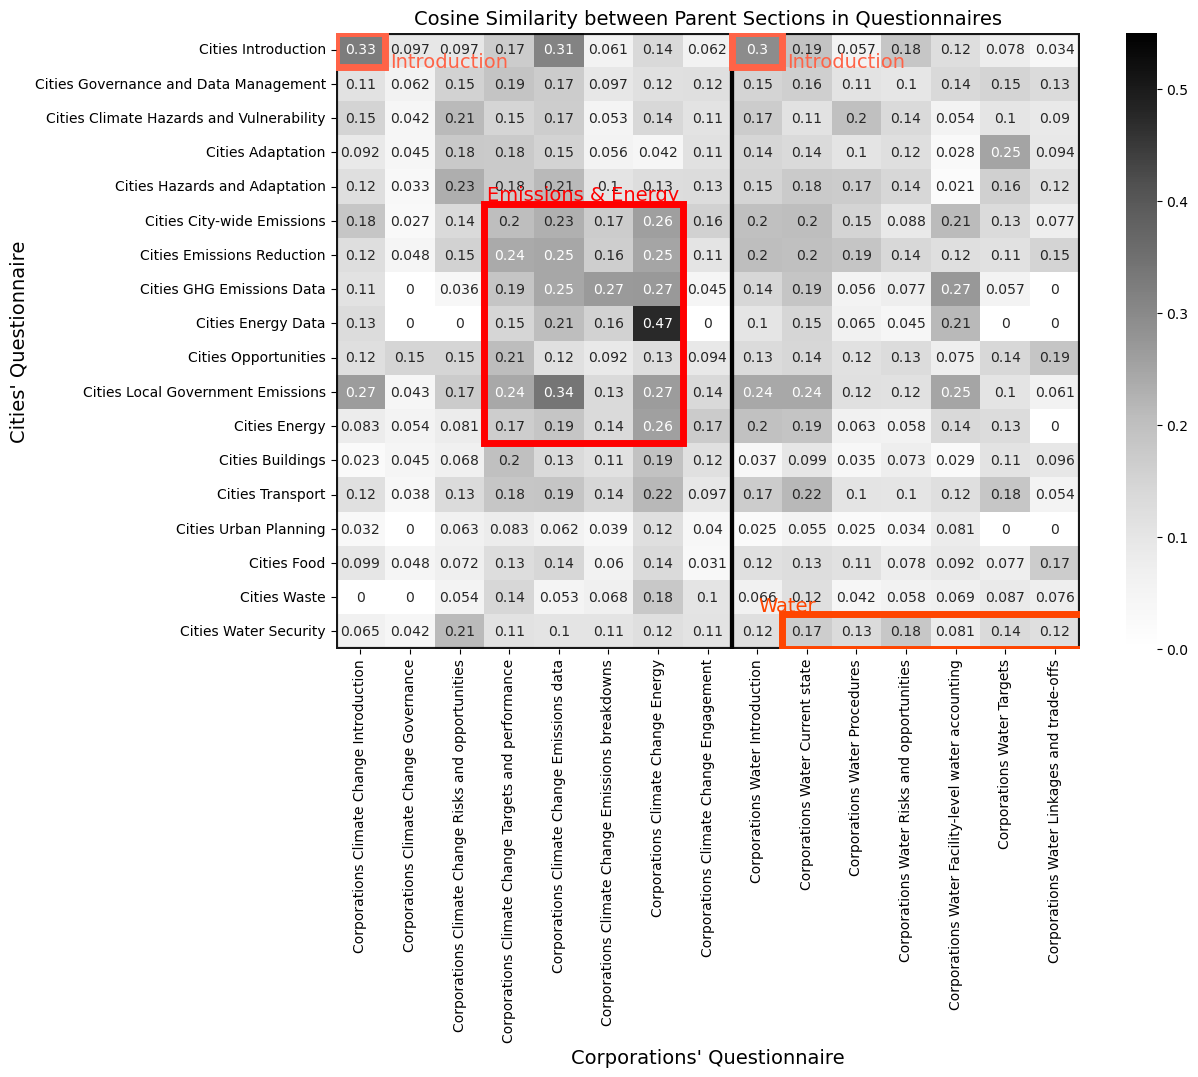

In [51]:
# Visualize similarity matrix
questionnaire_sections['questionnaire_section'] = questionnaire_sections.questionnaire + ' ' + questionnaire_sections.parent_section
similarity_matrix_df = pd.DataFrame(data=similarity_matrix, index=questionnaire_sections.questionnaire_section, columns=questionnaire_sections.questionnaire_section )
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
corporation_sections = [c for c in similarity_matrix_df.columns if c.startswith('Corporations')]
sns.heatmap(similarity_matrix_df[corporation_sections].iloc[2:20], cmap='Greys',  annot=True, vmax=0.55,)
ax.set_title('Cosine Similarity between Parent Sections in Questionnaires', fontsize=14)
ax.add_patch(Rectangle((0, 0), 8, 18, fill=False, alpha=0.9, color='Black', lw=3))
ax.add_patch(Rectangle((8, 0), 7, 18, fill=False, alpha=0.9, color='Black', lw=3))
plt.ylabel("Cities' Questionnaire", fontsize=14)
plt.xlabel("Corporations' Questionnaire", fontsize=14)

# Introductions
ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, alpha=1, color='Tomato', lw=5))
ax.annotate('Introduction', xy=(1.1, 1), fontsize=14, color='Tomato')#, weight='bold')#, horizontalalignment='center',verticalalignment='center') 

ax.add_patch(Rectangle((8, 0), 1, 1, fill=False, alpha=1, color='Tomato', lw=5))
ax.annotate('Introduction', xy=(9.1, 1), fontsize=14, color='Tomato')#, weight='bold')#, horizontalalignment='center',verticalalignment='center') 

# Cities and Corp. Climate Change
ax.add_patch(Rectangle((3, 5), 4, 7, fill=False, alpha=1, color='Red', lw=5))
ax.annotate('Emissions & Energy', xy=(5, 4.9), fontsize=14, color="Red", horizontalalignment='center') #verticalalignment='center', , weight='bold'

# Cities and Corp. Climate Change
ax.add_patch(Rectangle((9, 17), 7, 1, fill=False, alpha=1, color='Orangered', lw=5))
ax.annotate('Water', xy=(9.1, 16.9), fontsize=14, color="Orangered", horizontalalignment='center') #verticalalignment='center', , weight='bold'

plt.show()

#### More about the questions 

In [52]:
question_count = corporations_df.groupby(['survey_year', 'questionnaire']).question_name.nunique().to_frame().append(cities_df.groupby(['survey_year', 'questionnaire']).question_name.nunique().to_frame())
question_count = question_count.reset_index(drop=False)
question_count = question_count.pivot(index='survey_year',columns='questionnaire')['question_name']
question_count.style.set_caption('Number of questions by Year and Questionnaire')

questionnaire,Cities,Corporations Climate Change,Corporations Water
survey_year,,,
2018,167,58,54
2019,157,57,54
2020,166,55,48


## Overview of responses 

Number of cities to be disclosing: 2068
Number of cities actually disclosing: 1994
Number of corporations to be disclosing: 3370
Number of corporations actually disclosing: 3370


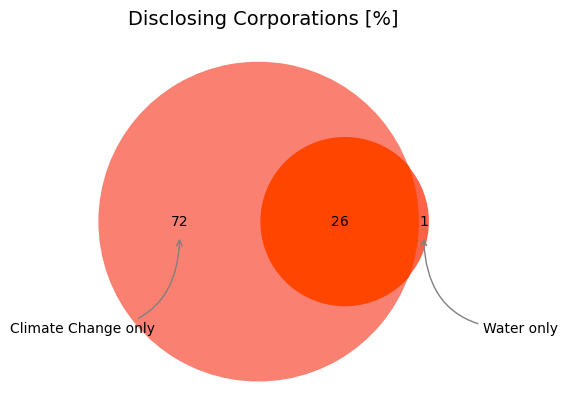

In [53]:
# Remove cities and corporations that didn't disclose
print(f"Number of cities to be disclosing: {len(cities_disclosing_df)}")
cities_disclosing_df = cities_disclosing_df[cities_disclosing_df.account_number.isin(cities_df.account_number.unique())]
print(f"Number of cities actually disclosing: {len(cities_disclosing_df)}")

print(f"Number of corporations to be disclosing: {len(corporations_disclosing_df)}")
corporations_disclosing_df = corporations_disclosing_df[corporations_disclosing_df.account_number.isin(corporations_df.account_number.unique())]
print(f"Number of corporations actually disclosing: {len(corporations_disclosing_df)}")

temp = corporations_df.groupby(['account_number', 'questionnaire']).questionnaire.nunique().to_frame()#.reset_index(drop=False)
temp.columns = ['answered']
temp = temp.reset_index(drop=False)
temp = temp.pivot(index='account_number',columns='questionnaire')['answered']
temp = temp.fillna(0)

temp.columns = ['climate_change', 'water']

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.set_title('Disclosing Corporations [%]', fontsize=14)

group1 = int((temp[(temp.climate_change == 1) & (temp.water == 0)].shape[0] / temp.shape[0])*100)
group2 = int((temp[(temp.climate_change == 0) & (temp.water == 1)].shape[0] / temp.shape[0])*100)
intersection = int((temp[(temp.climate_change == 1) & (temp.water == 1)].shape[0] / temp.shape[0])*100)

v = venn2(subsets = (group1, group2, intersection),
      #set_labels = ( 'Climate Change', 'Water', 'Both'),
          set_labels = ( '', '', ''),
          set_colors=( 'salmon', 'tomato'),
           alpha=1,
           ax=ax)

v.get_patch_by_id('11').set_color('orangered')
plt.annotate('Climate Change only', xy=v.get_label_by_id('10').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points',# bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.annotate('Water only', xy=v.get_label_by_id('01').get_position() - np.array([0, 0.05]), xytext=(70,-70),
             ha='center', textcoords='offset points',# bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5',color='gray'))
#c1 = venn2_circles(subsets = (group1, group2, intersection), color='red', ax=ax)
#c1[0].set_lw(3.0)
#c1[1].set_lw(0.0)
plt.show()

## Risk Assessment

Cluster physical risks to cities and corporations into 8 categories:

- Biological hazards
- Chemical change
- Extreme precipitation
- Extreme weather events (Floods, Storm, extreme hot/cold temperature)
- Sea level rise
- Water Scarcity
- Wild fire
- Other

In [54]:
# Filter for only the year 2020 in the corportations dataframe 
risks_corporations = corporations_df[corporations_df.survey_year == 2020]
risks_corporations.head()

,account_number,organization,survey_year,response_received_date,accounting_period_to,ors_response_id,submission_date,page_name,parent_section,question_number,...,row_number,row_name,subquestion_name,data_point_id,response_value,comments,questionnaire,section,question_number_major,question_number_minor
0,44675,Gibson Energy Inc,2020,2020-08-25T23:01:29Z,NaN,95375,2020-08-25T23:09:08Z,C0.2,Introduction,C0.2,...,1,Reporting year,C0.2_C1_State the start and end date of the ye...,1.0,2019-01-01,NaN,Corporations Climate Change,tbd,0.0,2
1,44675,Gibson Energy Inc,2020,2020-08-25T23:01:29Z,NaN,95375,2020-08-25T23:09:08Z,C0.3,Introduction,C0.3,...,0,NaN,C0.3Select the countries/areas for which you w...,1251.0,Canada,NaN,Corporations Climate Change,tbd,0.0,3
2,44675,Gibson Energy Inc,2020,2020-08-25T23:01:29Z,NaN,95375,2020-08-25T23:09:08Z,C12.1a,Engagement,C12.1a,...,2,NaN,C12.1a_C1_Provide details of your climate-rela...,2187.0,Information collection (understanding supplier...,NaN,Corporations Climate Change,tbd,12.0,1a
3,44675,Gibson Energy Inc,2020,2020-08-25T23:01:29Z,NaN,95375,2020-08-25T23:09:08Z,C12.1a,Engagement,C12.1a,...,1,NaN,C12.1a_C2_Provide details of your climate-rela...,7676.0,Code of conduct featuring climate change KPIs,NaN,Corporations Climate Change,tbd,12.0,1a
4,44675,Gibson Energy Inc,2020,2020-08-25T23:01:29Z,NaN,95375,2020-08-25T23:09:08Z,C12.1a,Engagement,C12.1a,...,3,NaN,C12.1a_C2_Provide details of your climate-rela...,7676.0,Run an engagement campaign to educate supplier...,NaN,Corporations Climate Change,tbd,12.0,1a


In [55]:
# Create the likelihood dictionary to map qualitative descriptions of likelihood to numerical values
likelihood_dict = {'Unknown' : -1,
                   'Exceptionally unlikely' : 0,
                   'Very unlikely' : 0, 
                   'Unlikely' : 1,
                   'About as likely as not' : 2,
                   'More likely than not' : 2,
                   'Likely' : 3, 
                   'Very likely' : 4,
                   'Virtually certain': 4}

# Create the impact dictionary to map qualitative descriptions of impact to numerical values
impact_dict = { 'Unknown' : -1, 
                'Low' : 0,
               'Medium-low': 1,
               'Medium' : 2, 
               'Medium-high' :3, 
               'High' :4}

### Climate 

In [56]:
### Climate ###

# Create a list of specific values in the subquestion_name column that need to be selected 
cols = ['C2.3a_C3_Provide details of risks identified with the potential to have a substantive financial or strategic impact on your business. - Risk type & Primary climate-related risk driver',
        'C2.3a_C8_Provide details of risks identified with the potential to have a substantive financial or strategic impact on your business. - Likelihood',
        'C2.3a_C9_Provide details of risks identified with the potential to have a substantive financial or strategic impact on your business. - Magnitude of impact',]

# Use a boolean index to filter rows in the risks_corporations DataFrame to select only the rows where the 'subquestion_name' column's values are found in the cols list
# Then select specific columns from the filtered rows using
# Then reset the index of the resulting dataframe 
risks_corp_climate = risks_corporations[risks_corporations.subquestion_name.isin(cols)][['account_number',  'row_number','subquestion_name', 'response_value']].reset_index(drop=True)

# View the progress thus far 
risks_corp_climate.head()

,account_number,row_number,subquestion_name,response_value
0,44675,3,C2.3a_C3_Provide details of risks identified w...,Carbon pricing mechanisms
1,44675,1,C2.3a_C8_Provide details of risks identified w...,About as likely as not
2,44675,1,C2.3a_C3_Provide details of risks identified w...,Increased stakeholder concern or negative stak...
3,44675,2,C2.3a_C8_Provide details of risks identified w...,About as likely as not
4,44675,3,C2.3a_C8_Provide details of risks identified w...,About as likely as not


In [58]:
# Split Risk type & Primary climate-related risk driver

# Use NumPy's np.where function to check if the 'response_value' column contains specific values ('Current regulation', 'Emerging regulation', 'Legal', 'Technology', 'Acute physical', 'Chronic physical', 'Market', 'Reputation')
# If the condition is met for a row, it assigns the string 'risk_category' to the 'subquestion_name' column for that row
# If the condition is not met, it keeps the original 'subquestion_name' value
risks_corp_climate['subquestion_name'] = np.where((risks_corp_climate['response_value'].isin(['Current regulation', 'Emerging regulation', 'Legal', 'Technology', 'Acute physical', 'Chronic physical', 'Market', 'Reputation'])), 
                                                  'risk_category', 
                                                  risks_corp_climate['subquestion_name'])

# Drop NaN
# Use Boolean indexing to remove rows where the 'response_value' column is NaN (missing values)
risks_corp_climate = risks_corp_climate[~risks_corp_climate.response_value.isna()]

# Pivot and rename colums
# Restructure the df so that values in the 'subquestion_name' column become new columns
# Then the index is set to a combination of 'account_number' and 'row_number', and the columns are 'subquestion_name' values
# After pivoting, it renames the columns to 'risk', 'likelihood', 'impact', and 'risk_category'
risks_corp_climate = risks_corp_climate.pivot(index=['account_number', 'row_number'], columns='subquestion_name')['response_value']
risks_corp_climate.columns = ['risk','likelihood', 'impact', 'risk_category']

# Reset the index 
risks_corp_climate = risks_corp_climate.reset_index(drop=False)

# Rearrange and drop row_number column
# Reorders the columns in the DataFrame, placing 'account_number' first, followed by 'risk_category', 'risk', 'impact', and 'likelihood'
risks_corp_climate = risks_corp_climate[['account_number', 'risk_category', 'risk',  'impact', 'likelihood']]

risks_corp_climate.head()

,account_number,risk_category,risk,impact,likelihood
0,58,Market,Uncertainty in market signals,Unknown,Unknown
1,119,Current regulation,Carbon pricing mechanisms,Medium,Virtually certain
2,119,Current regulation,Carbon pricing mechanisms,Medium,Virtually certain
3,119,Chronic physical,Changes in precipitation patterns and extreme ...,Medium,More likely than not
4,119,Acute physical,"Other, please specify: Forest infestation",Medium,Likely


### Water

In [59]:
### Water ###

# Create a list of specific values in the subquestion_name column that need to be selected 
cols = ['W4.2_C2_Provide details of identified risks in your direct operations with the potential to have a substantive financial or strategic impact on your business, and your response to those risks. - Type of risk & Primary risk driver',
         'W4.2_C7_Provide details of identified risks in your direct operations with the potential to have a substantive financial or strategic impact on your business, and your response to those risks. - Likelihood',
        'W4.2_C6_Provide details of identified risks in your direct operations with the potential to have a substantive financial or strategic impact on your business, and your response to those risks. - Magnitude of potential impact',]

# Use a boolean index to filter rows in the risks_corporations DataFrame to select only the rows where the 'subquestion_name' column's values are found in the cols list
# Then select specific columns from the filtered rows using
# Then reset the index of the resulting dataframe 
risks_corp_water = risks_corporations[risks_corporations.subquestion_name.isin(cols)][['account_number',  'row_number','subquestion_name', 'response_value']].reset_index(drop=True)
risks_corp_water.head()

,account_number,row_number,subquestion_name,response_value
0,64106,0,W4.2_C2_Provide details of identified risks in...,NaN
1,64106,0,W4.2_C6_Provide details of identified risks in...,NaN
2,64106,0,W4.2_C7_Provide details of identified risks in...,NaN
3,64106,0,W4.2_C2_Provide details of identified risks in...,NaN
4,2407,0,W4.2_C2_Provide details of identified risks in...,NaN


In [60]:
# Split Risk type & Primary climate-related risk driver

# Use NumPy's np.where function to check if the 'response_value' column contains specific values 
# If the condition is met for a row, it assigns the string 'risk_category' to the 'subquestion_name' column for that row
# If the condition is not met, it keeps the original 'subquestion_name' value
risks_corp_water['subquestion_name'] = np.where((risks_corp_water['response_value'].isin(['Physical', 'Regulatory', 'Reputation & markets', 'Technology'])), 
                                                'risk_category', 
                                                risks_corp_water['subquestion_name'])

# Drop NaN
risks_corp_water = risks_corp_water[~risks_corp_water.response_value.isna()]

# Pivot and rename colums
# Restructure the df so that values in the 'subquestion_name' column become new columns
# Then the index is set to a combination of 'account_number' and 'row_number', and the columns are 'subquestion_name' values
# After pivoting, rename the columns 
risks_corp_water = risks_corp_water.pivot(index=['account_number', 'row_number'], columns='subquestion_name')['response_value']
risks_corp_water.columns = ['risk','impact', 'likelihood', 'risk_category']

# Reset the index 
risks_corp_water = risks_corp_water.reset_index(drop=False)

# Rearrange and drop row_number column
# Reorders the columns in the DataFrame, placing 'account_number' first, followed by 'risk_category', 'risk', 'impact', and 'likelihood'
risks_corp_water = risks_corp_water[['account_number', 'risk_category', 'risk',  'impact', 'likelihood']]

# View progress
risks_corp_water.head()


,account_number,risk_category,risk,impact,likelihood
0,350,Regulatory,Regulatory uncertainty,Medium,Very unlikely
1,350,Regulatory,Regulatory uncertainty,Medium,About as likely as not
2,661,Physical,Dependency on water intensive energy sources,Medium-high,Very unlikely
3,661,Regulatory,Regulation of discharge quality/volumes,Medium-high,Unknown
4,661,Regulatory,Regulatory uncertainty,Medium-high,Likely


### Climate and water 

In [61]:
### Merge Climate and Water responses ###

# Essentially stack the two dataframes for climate change and water security on top of one another 
risks_corporations = risks_corp_climate.append(risks_corp_water)

# Filter out rows in the risks_corporations DataFrame where the 'risk_category' column has missing values (NaN)
risks_corporations = risks_corporations[(~risks_corporations.risk_category.isna())]

# Further filter the DataFrame to include only rows where the 'risk_category' contains the substring 'hysical'
# This filters for rows related to physical risks
risks_corporations = risks_corporations[risks_corporations.risk_category.str.contains('hysical')]


# Use pre-defined dictionaries (impact_dict and likelihood_dict) to replace values in the 'impact' and 'likelihood' columns with numeric values
# This converts qualitative values into numerical values for these columns
risks_corporations.impact = risks_corporations.impact.replace(impact_dict)
risks_corporations.likelihood = risks_corporations.likelihood.replace(likelihood_dict)

# Filter the DataFrame to keep only rows where both 'impact' and 'likelihood' have values greater than -1
# This removes the 'unknown' corporation answers 
risks_corporations = risks_corporations[(risks_corporations.impact >-1) & (risks_corporations.likelihood >-1)]

# Reset the index by creating a new default integer index
# Keep the old index as a separate column
risks_corporations = risks_corporations.reset_index(drop=False)

# View the progress
risks_corporations.head()

,index,account_number,risk_category,risk,impact,likelihood
0,3,119,Chronic physical,Changes in precipitation patterns and extreme ...,2.0,2.0
1,4,119,Acute physical,"Other, please specify: Forest infestation",2.0,3.0
2,7,119,Chronic physical,Rising sea levels,0.0,3.0
3,9,304,Chronic physical,Changes in precipitation patterns and extreme ...,2.0,2.0
4,14,391,Acute physical,Increased severity and frequency of extreme we...,3.0,3.0


In [62]:
# Create a function that categorises risks based on their descriptions
# It takes a risk description (x) as input and returns a category for that risk based on predefined criteria


def categorize_risks_corporations(x):
    
    ### Check for Specific Risk Descriptions ###
    # Begin with a series of if statements that check if the input x matches specific risk descriptions
    if x in ['Increased water scarcity', 'Drought', 'Rationing of municipal water supply', 'Increased water stress']:
        return 'Water Scarcity'
    elif x in ['Rising sea levels']:
        return 'Sea level rise'
    elif x in ['Increased likelihood and severity of wildfires']:
        return 'Wild fire'
    elif x in ['Changes in precipitation patterns and extreme variability in weather patterns']:
        return 'Extreme Precipitation'
    elif x in ['Increased severity and frequency of extreme weather events such as cyclones and floods', 'Flooding', 'Severe weather events', 'Rising mean temperatures']:
        return 'Extreme weather events'
    elif x in ['Acid rock drainage and metal leaching', 'Ecosystem vulnerability', ]:
        return 'Chemical change'   
    elif x in ['Pollution incident', 'Declining water quality']:
        return 'Biological hazards' 
 
    ### Check for Generic Categories ###
    # First checks if the description contains the word 'Other'
    # If it does, it further examines the description to assign a category based on keywords within the description
    else:
        if 'Other' in x:
            if (('pollution' in x.lower()) | ('disease' in x.lower()) | ('pandemic' in x.lower())):
                return 'Biological hazards'
            elif (('weather' in x.lower()) | ('heat' in x.lower()) | ('flood' in x.lower()) | ('temperature' in x.lower())):
                return 'Extreme weather events'
            elif (('drought' in x.lower()) | ('water scarcity' in x.lower()) | ('water availability' in x.lower()) | ('water stress' in x.lower())):
                return 'Water Scarcity'
            elif 'level' in x.lower():
                return 'Sea level rise'
            
            ### Default to 'Other' Category ###
            # If the input x does not match any of the specific risk descriptions or the generic keywords in the else block, the function defaults to assigning the category 'Other'
            else:
                return 'Other'


In [63]:
# Add a new column called 'risk_cluster' to the risks_corporations DataFrame 
# Use the apply method along with a lambda function to apply the categorize_risks_corporations function to each value in the 'risk' column
# This function assigns a risk category based on the description in the column 'risk' 
# The result is that the 'risk_cluster' column now contains the assigned risk categories for each row in the DataFrame
risks_corporations['risk_cluster'] = risks_corporations.risk.apply(lambda x: categorize_risks_corporations(x))

# Filter the risks_corporations DataFrame to exclude rows where the 'risk_cluster' is 'Other'
# Create a new DataFrame called risks_corporations_grouped containing only rows with meaningful risk clusters (i.e., excluding 'Other')
risks_corporations_grouped = risks_corporations[risks_corporations.risk_cluster != 'Other'].groupby(['risk_cluster']).agg(num_count = ('likelihood', 'count'),
                                                                               likelihood_mean = ('likelihood', 'mean'),
                                                                               impact_mean = ('impact', 'mean'),
                                                                              ).reset_index(drop=False)

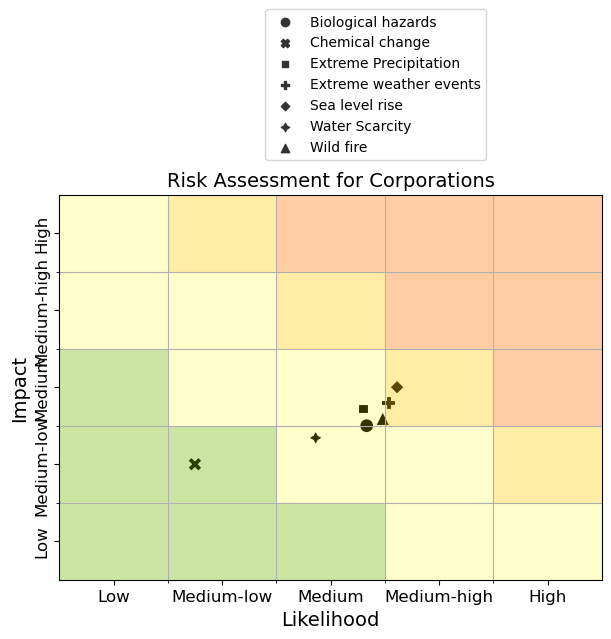

In [64]:
# Create a scatter plot 

fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(data=risks_corporations_grouped, x='likelihood_mean', y='impact_mean', style='risk_cluster', s=100, color='black')
ax.set_title("Risk Assessment for Corporations", fontsize=14)

# Add the rectangles
ax.add_patch(Rectangle((-0.5, -0.5), 7, 5, fill=True, alpha=0.2, color='Yellow', lw=0))
ax.add_patch(Rectangle((-0.5, -0.5), 2, 2, fill=True, alpha=0.2, color='Green', lw=0))
ax.add_patch(Rectangle((1.5, -0.5), 1, 1, fill=True, alpha=0.2, color='Green', lw=0))
ax.add_patch(Rectangle((-0.5, 1.5), 1, 1, fill=True, alpha=0.2, color='Green', lw=0))
ax.add_patch(Rectangle((3.5, 0.5), 1, 1, fill=True, alpha=0.2, color='Orange', lw=0))
ax.add_patch(Rectangle((0.5, 3.5), 1, 1, fill=True, alpha=0.2, color='Orange', lw=0))
ax.add_patch(Rectangle((2.5, 1.5), 1, 1, fill=True, alpha=0.2, color='Orange', lw=0))
ax.add_patch(Rectangle((1.5, 2.5), 1, 1, fill=True, alpha=0.2, color='Orange', lw=0))
ax.add_patch(Rectangle((2.5, 2.5), 2, 2, fill=True, alpha=0.2, color='Red', lw=0))
ax.add_patch(Rectangle((3.5, 1.5), 1, 1, fill=True, alpha=0.2, color='Red', lw=0))
ax.add_patch(Rectangle((1.5, 3.5), 1, 1, fill=True, alpha=0.2, color='Red', lw=0))

# Set labels and axis properties
ax.set_ylabel(ylabel='Impact', fontsize=14)
ax.set_xlabel(xlabel='Likelihood', fontsize=14)
ax.set_yticks([0.5, 1.5, 2.5, 3.5], minor=True)
ax.yaxis.grid(True, which='minor')
ax.set_yticklabels(['', 'Low', 'Medium-low', 'Medium', 'Medium-high', 'High'], rotation=90, va='center', fontsize=12)
ax.set_xticks([0.5, 1.5, 2.5, 3.5], minor=True)
ax.xaxis.grid(True, which='minor')
ax.set_xticklabels(['', 'Low', 'Medium-low', 'Medium', 'Medium-high', 'High'], fontsize=12)
ax.legend(bbox_to_anchor=(0.8, 1.5))
ax.set_ylim(-0.5, 4.5)
ax.set_xlim(-0.5, 4.5)

plt.show()

In [65]:
# Sort the rows in the risks_corporations_grouped DataFrame based on the values in the 'num_count' column in descending order (ascending=False)
# The result is that the DataFrame will be reordered with the risk clusters having the highest number of occurrences (highest 'num_count') at the top
# After resorting, reset the index and drop the old index
# Use the Pandas Styler to format the dataframe
risks_corporations_grouped.sort_values(by='num_count', ascending=False).reset_index(drop=True).style.set_caption("Corporations' Pyhsical Risks")

,risk_cluster,num_count,likelihood_mean,impact_mean
0,Extreme weather events,595,2.532773,1.801681
1,Extreme Precipitation,192,2.302083,1.723958
2,Water Scarcity,146,1.863014,1.342466
3,Sea level rise,44,2.613636,2.000000
4,Wild fire,27,2.481481,1.592593
5,Biological hazards,24,2.333333,1.500000
6,Chemical change,4,0.750000,1.000000
